In [1]:
setwd('/import/liujing/data/my')

In [2]:
load('../combat_edata1.rda')

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
prot = read.table('./prot.txt',header = T,sep = '\t')

In [5]:
combat_edata1 = combat_edata1 %>% as.data.frame() %>%  dplyr::filter(rownames(.) %in% prot$GeneName)

In [6]:
library(dplyr)

In [7]:
library(tidyverse)

cellMarker <- read.csv("../cellmarker.txt", header = F, sep = "\t") # 用EXCEL打开删除NA列
cellMarker <- cellMarker %>% column_to_rownames("V1") %>% t()

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v ggplot2   3.5.1     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats

In [8]:
a <- cellMarker
a <- a[1:nrow(a), ]
set <- colnames(a)
geneSet <- list()
# i <- "Activated CD8 T cell"
for (i in set) {
  x <-  as.character(a[,i])
  x <- x[nchar(x)!=0]
  x <-  as.character(x)
  geneSet[[i]] <-x
}

In [9]:
library(GSVA)

ssgsea <- gsva(as.matrix(combat_edata1), geneSet, method='ssgsea', kcdf='Gaussian', abs.ranking=TRUE)

Warning message:
"package 'GSVA' was built under R version 4.2.3"
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


Estimating ssGSEA scores for 28 gene sets.
[1] "Calculating ranks..."


Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


[1] "Calculating absolute values from ranks..."
  |======================================================================| 100%

[1] "Normalizing..."


In [15]:
a <- ssgsea %>% t() %>% as.data.frame()
identical(rownames(a), rownames(anno))

[1] TRUE

In [18]:
ssgsea

,CI10_M1,CI11_M1,CI12_M1,CI13_M1,CI14_M1,CI15_M1,CI16_M1,CI17_M1,CI18_M1,CI19_M1,...,H18_M2,H1_M2,H2_M2,H3_M2,H4_M2,H5_M2,H6_M2,H7_M2,H8_M2,H9_M2
Activated CD8 T cell,0.58039813,0.54625198,0.57344866,0.50223809,0.565040516,0.587303336,0.55865249,0.57812245,0.52398474,0.56478367,...,0.57023857,0.56102174,0.56572799,0.57955006,0.604318265,0.57579678,0.58910422,0.59213448,0.55490059,0.57791655
Central memory CD8 T cell,0.34108659,0.40026967,0.37987355,0.35537526,0.355935528,0.348265693,0.39284244,0.38573034,0.38895986,0.37829276,...,0.36755759,0.35944740,0.33920486,0.35163250,0.360460776,0.35828493,0.39873735,0.35935930,0.37052290,0.36113860
Effector memeory CD8 T cell,0.50274866,0.46573745,0.47251035,0.45048051,0.454500525,0.498978685,0.46931275,0.48760295,0.43970519,0.47636475,...,0.49429423,0.48374081,0.47335022,0.49778610,0.487717147,0.49822095,0.49649730,0.52097262,0.47717103,0.48710395
Activated CD4 T cell,0.36841930,0.25566647,0.27273969,0.23518070,0.265427247,0.365252864,0.23688984,0.26168124,0.24589743,0.24269276,...,0.27184490,0.25673966,0.31141176,0.26677160,0.288028294,0.27382535,0.28356261,0.28839943,0.24129963,0.28644250
Central memory CD4 T cell,0.54995969,0.55914020,0.59521050,0.57676848,0.584944598,0.544562724,0.57946631,0.58263538,0.55863080,0.56110726,...,0.57204465,0.54498688,0.56844726,0.59502096,0.582444486,0.56762613,0.56615158,0.58013939,0.57278958,0.56859442
Effector memeory CD4 T cell,0.29951992,0.26899893,0.26804379,0.28629639,0.297386981,0.287862032,0.26808121,0.28466094,0.30555611,0.28459768,...,0.27650758,0.27029178,0.30700150,0.27255516,0.266888228,0.28847954,0.27959956,0.28480983,0.26491601,0.30080687
T follicular helper cell,0.26113526,0.25290540,0.27162516,0.25709326,0.238462372,0.254666809,0.25795713,0.23614056,0.24501208,0.23779791,...,0.27100171,0.27428050,0.23795886,0.26003760,0.246091306,0.26196538,0.26485165,0.28773393,0.26400813,0.24486761
Gamma delta T cell,0.37484793,0.35952100,0.32119607,0.34055449,0.361612425,0.318633197,0.33485732,0.33291305,0.36417740,0.35154711,...,0.34385748,0.34375545,0.35207065,0.35254612,0.347560995,0.33961991,0.34333896,0.33403731,0.33109813,0.34038419
Type 1 T helper cell,0.21165238,0.22399661,0.20956746,0.22103538,0.212134027,0.209084192,0.20633528,0.22001178,0.20670569,0.22784729,...,0.22745951,0.22871842,0.22262030,0.23744604,0.229310689,0.22637265,0.21012751,0.21910205,0.22654888,0.22556119
Type 17 T helper cell,0.04484150,0.02577281,0.01772521,0.04859401,0.009575995,0.004617637,0.01486663,0.00576151,0.04548495,0.02835218,...,0.01981340,0.06232928,0.01919950,0.03705994,-0.006751132,0.01874953,0.04525238,0.02197878,0.03587998,0.03856169


In [16]:

a$group <- anno$group # CIBERSORT中的数据
a <- a %>% rownames_to_column("sample")

In [135]:
write.table(a, "ssGSEA.txt", sep = "\t", row.names = T, col.names = NA, quote = F)

In [136]:
ssgsea.1 <- ssgsea
for (i in colnames(ssgsea)) {
  #i <- colnames(ssgsea)[1]
  ssgsea.1[,i] <- (ssgsea[,i] -min(ssgsea[,i]))/(max(ssgsea[,i] )-min(ssgsea[,i] ))
  
}
apply(ssgsea.1[,1:6], 2, range)

CI10_M1,CI11_M1,CI12_M1,CI13_M1,CI14_M1,CI15_M1
0,0,0,0,0,0
1,1,1,1,1,1


In [137]:
library(ggpubr)

In [138]:
options(repr.plot.width = 14)

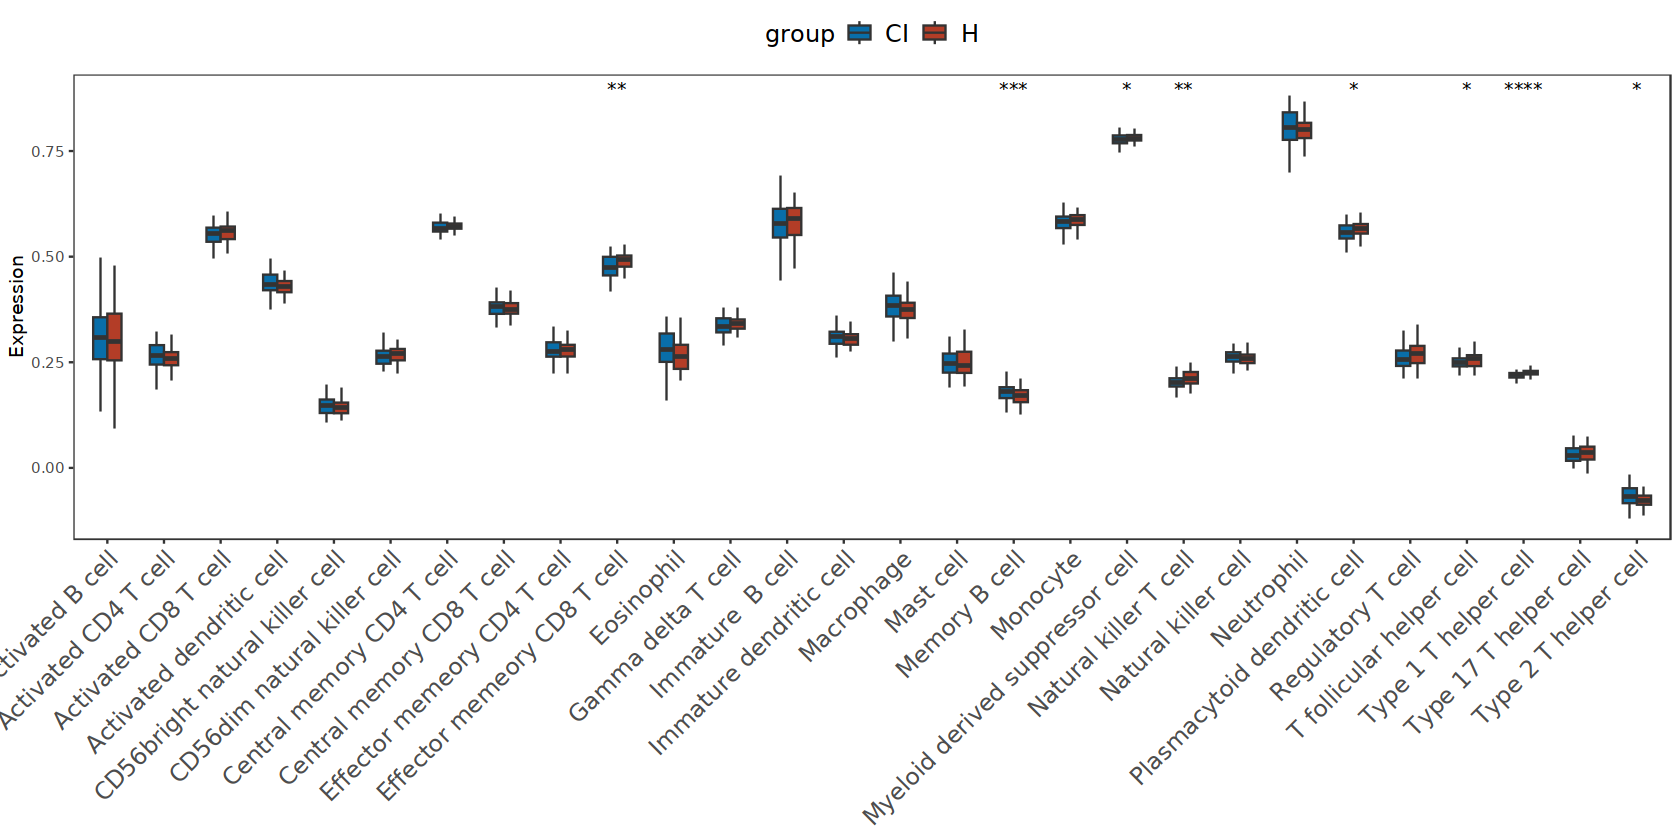

In [139]:
LUAD_ggsea <- gather(a,key = ssgsea, value = Expression, -c(group,sample)) 

ggplot(LUAD_ggsea, aes(x = ssgsea, y = Expression)) + 
  labs(y="Expression", x =  NULL) +  
  geom_boxplot(aes(fill = group), position = position_dodge(0.5), width = 0.5, outlier.alpha = 0) + 
  scale_fill_manual(values = c("#096EA9", "#B33D27")) +
  theme_bw() + 
  theme(plot.title = element_text(size = 14,color="black",hjust = 0.5), 
        axis.text.x = element_text(angle = 45, hjust = 1 ,size = 14),
        panel.grid = element_blank(),
        legend.position = "top",
        legend.text = element_text(size= 14),
        legend.title= element_text(size= 14)) + 
  stat_compare_means(aes(group =  group),
                     label = "p.signif",
                     method = "t.test",
                     hide.ns = T)

In [140]:
expr = combat_edata1[c('TNFSF14','CCNA2','MARCKS','SGOL1','SAP130'),] %>% t() %>%  as.data.frame()

In [141]:
cell   = ssgsea %>% t() %>% as.data.frame() 

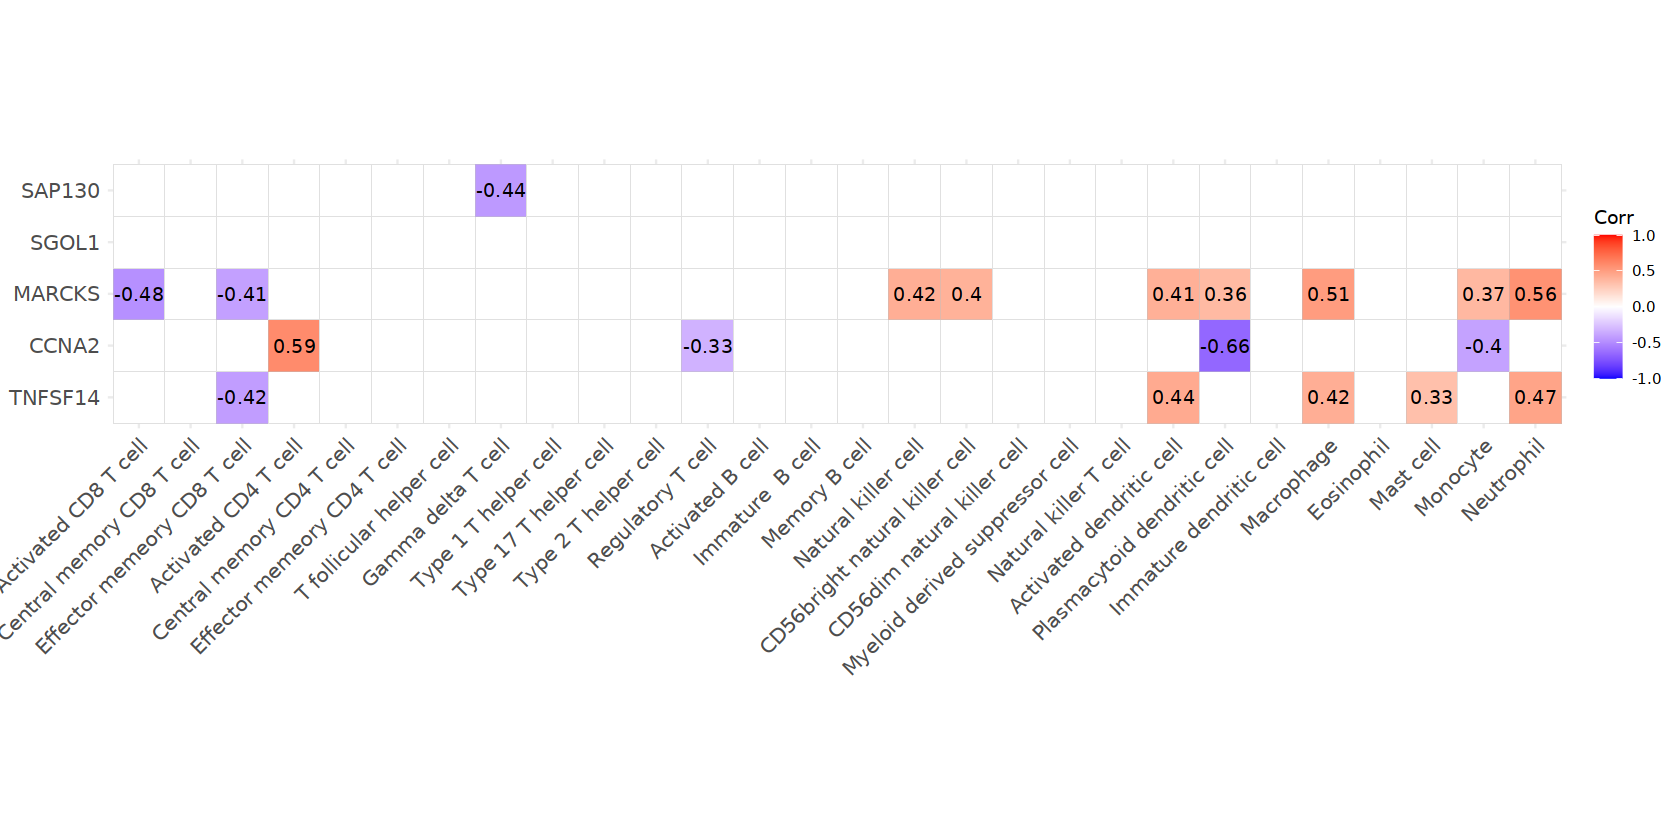

In [142]:
sig_gene <- c('TNFSF14','CCNA2','MARCKS','SGOL1','SAP130')


library(psych)
x <- expr[,sig_gene]
y <- cell


library(psych)
d <- corr.test(x,y,use="complete",method = 'spearman')

r <- d$r
p <- d$p

library(ggcorrplot)
ggcorrplot(t(d$r), show.legend = T, 
           p.mat = t(d$p.adj), digits = 2,  sig.level = 0.05,insig = 'blank',lab = T)

### 读取nmf分组

In [118]:
load('bulk2.rda')

In [119]:
b=  a %>%  dplyr::filter(sample %in%  rownames(groupinfo))

In [120]:
b$group = groupinfo$group

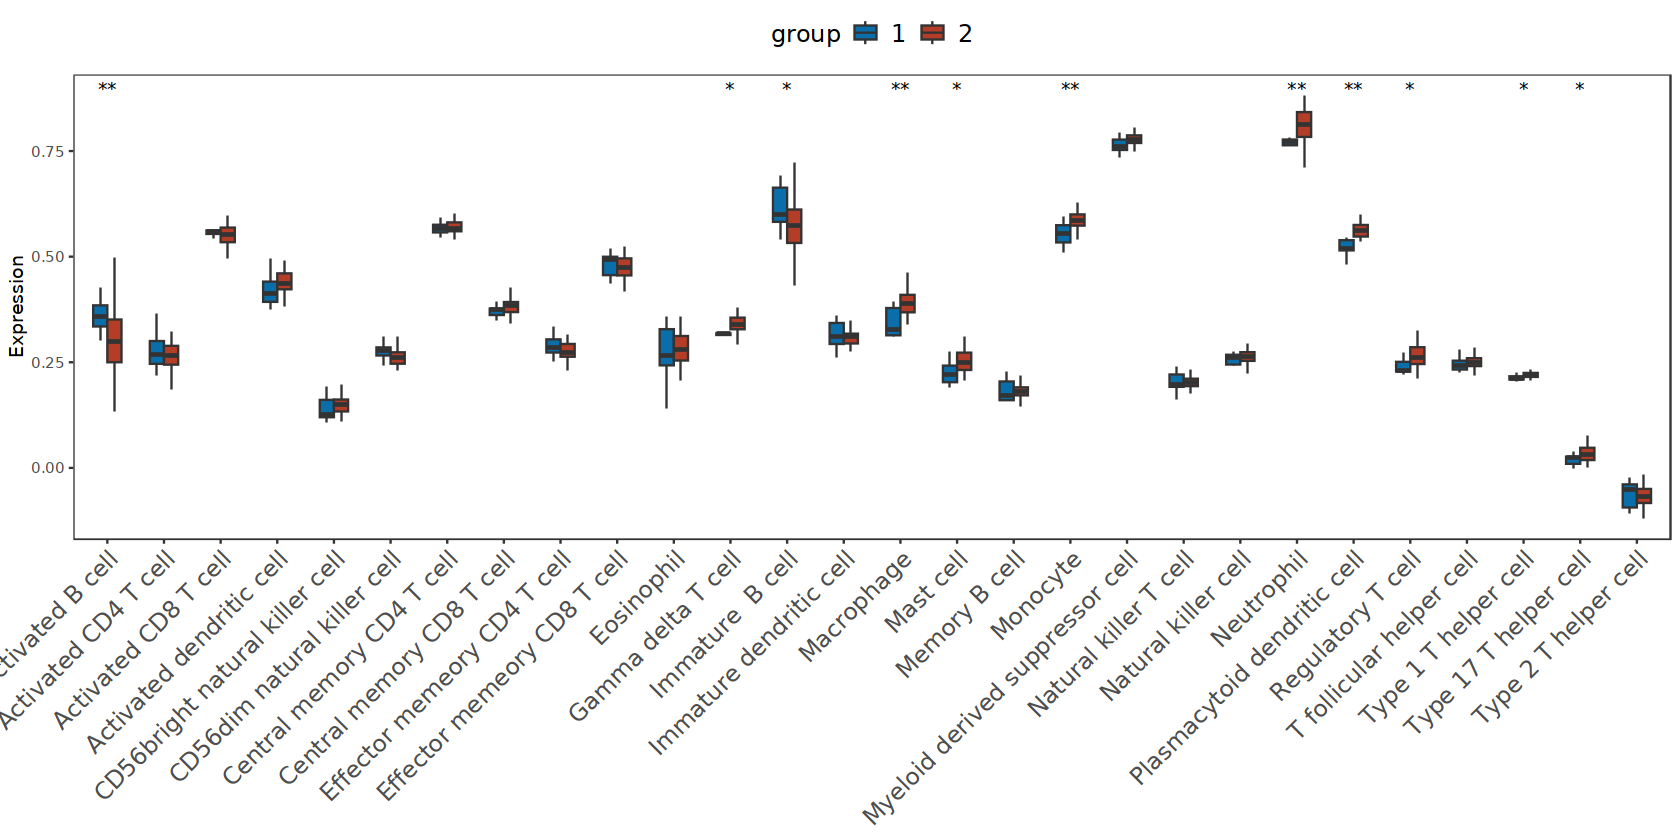

In [121]:
LUAD_ggsea <- gather(b,key = ssgsea, value = Expression, -c(group,sample)) 

ggplot(LUAD_ggsea, aes(x = ssgsea, y = Expression)) + 
  labs(y="Expression", x =  NULL) +  
  geom_boxplot(aes(fill = group), position = position_dodge(0.5), width = 0.5, outlier.alpha = 0) + 
  scale_fill_manual(values = c("#096EA9", "#B33D27")) +
  theme_bw() + 
  theme(plot.title = element_text(size = 14,color="black",hjust = 0.5), 
        axis.text.x = element_text(angle = 45, hjust = 1 ,size = 14),
        panel.grid = element_blank(),
        legend.position = "top",
        legend.text = element_text(size= 14),
        legend.title= element_text(size= 14)) + 
  stat_compare_means(aes(group =  group),
                     label = "p.signif",
                     method = "wilcox.test",
                     hide.ns = T)

In [122]:
write.csv(a,file = 'ssgsea.csv',row.names =F)

### lasso回归后的细胞

In [123]:
sig_gene <- c('TNFSF14','CCNA2','MARCKS','SGOL1','SAP130')


library(psych)
x <- expr[,sig_gene]
y <- cell

In [128]:
load('./lasso.cell.rda')

In [129]:
y1 = y %>%  dplyr::select(gene_1se)

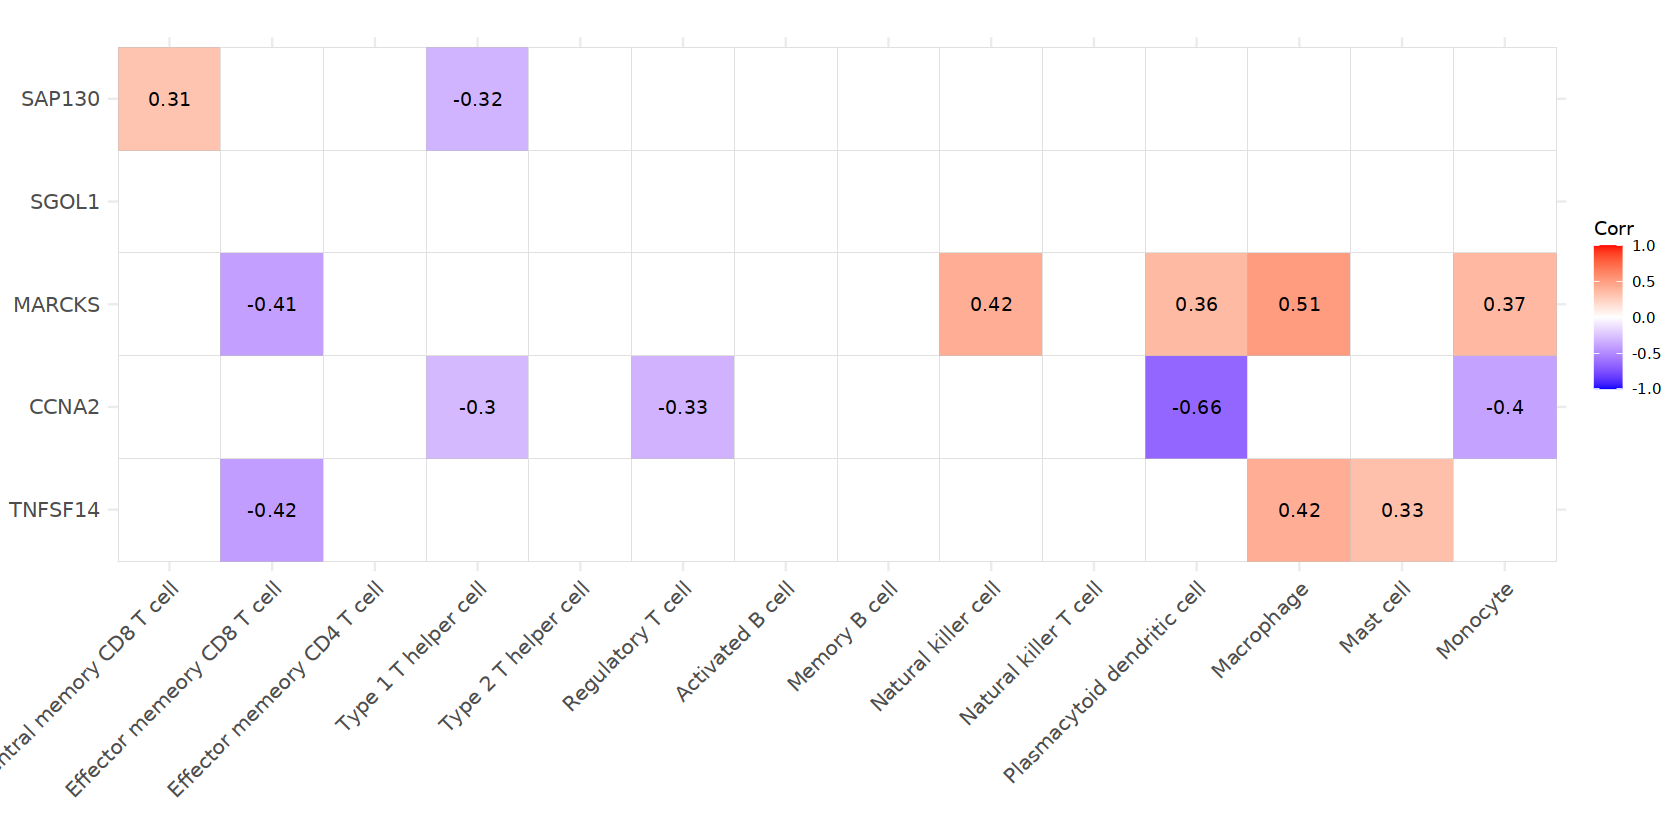

In [132]:
library(psych)
d <- corr.test(x,y1,use="complete",method = 'spearman')

r <- d$r
p <- d$p

library(ggcorrplot)
ggcorrplot(t(d$r), show.legend = T, 
           p.mat = t(d$p.adj), digits = 2,  sig.level = 0.05,insig = 'blank',lab = T)